<a href="https://colab.research.google.com/github/Abre1234/credit-risk-xai/blob/main/notebooks/04_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/Abre1234/credit-risk-xai.git

# Go into repo folder
%cd credit-risk-xai
!ls

Cloning into 'credit-risk-xai'...
remote: Enumerating objects: 83, done.
remote: Counting objects: 100% (83/83), done.
remote: Compressing objects: 100% (73/73), done.
remote: Total 83 (delta 28), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (83/83), 4.37 MiB | 4.43 MiB/s, done.
Resolving deltas: 100% (28/28), done.
/content/credit-risk-xai
data  notebooks  README.md  requirements.tex


Import

In [2]:

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, classification_report,
    confusion_matrix
)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:

X_train = pd.read_csv('data/processed/X_train_res.csv')
y_train = pd.read_csv('data/processed/y_train_res.csv').squeeze()

X_test = pd.read_csv('data/processed/X_test.csv')
y_test = pd.read_csv('data/processed/y_test.csv').squeeze()

In [4]:
X_train.shape, X_test.shape

((40756, 22), (6517, 22))

Baseline Model — Logistic Regression

In [5]:

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

y_pred_lr = log_reg.predict(X_test)
y_prob_lr = log_reg.predict_proba(X_test)[:, 1]

Evaluation

In [6]:

print("Logistic Regression Results")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))
print("F1:", f1_score(y_test, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_test, y_prob_lr))

Logistic Regression Results
Accuracy: 0.8146386374098512
Precision: 0.5533932135728543
Recall: 0.779887482419128
F1: 0.6474022183304144
ROC AUC: 0.8714417626282076


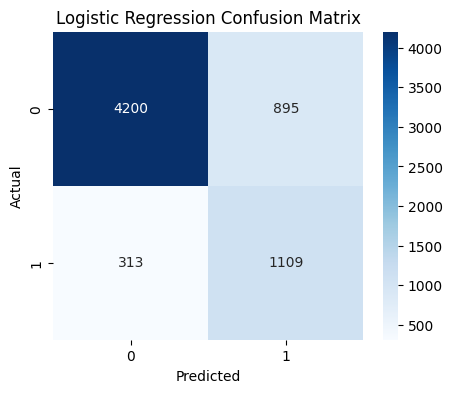

In [7]:

cm = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

Random Forest

In [8]:

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    random_state=42,
    class_weight='balanced'
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

In [9]:

print("Random Forest Results")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1:", f1_score(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_prob_rf))

Random Forest Results
Accuracy: 0.9119226638023631
Precision: 0.8392
Recall: 0.7376933895921237
F1: 0.7851796407185628
ROC AUC: 0.9218440350637467


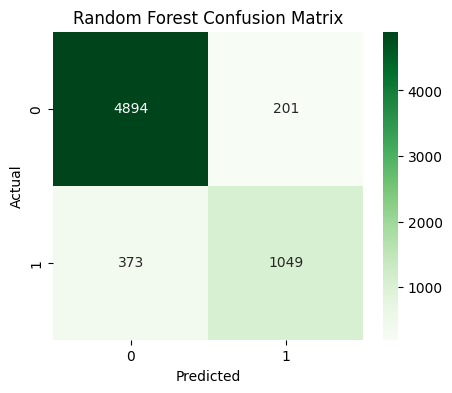

In [10]:

cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(5,4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()

Feature Importance

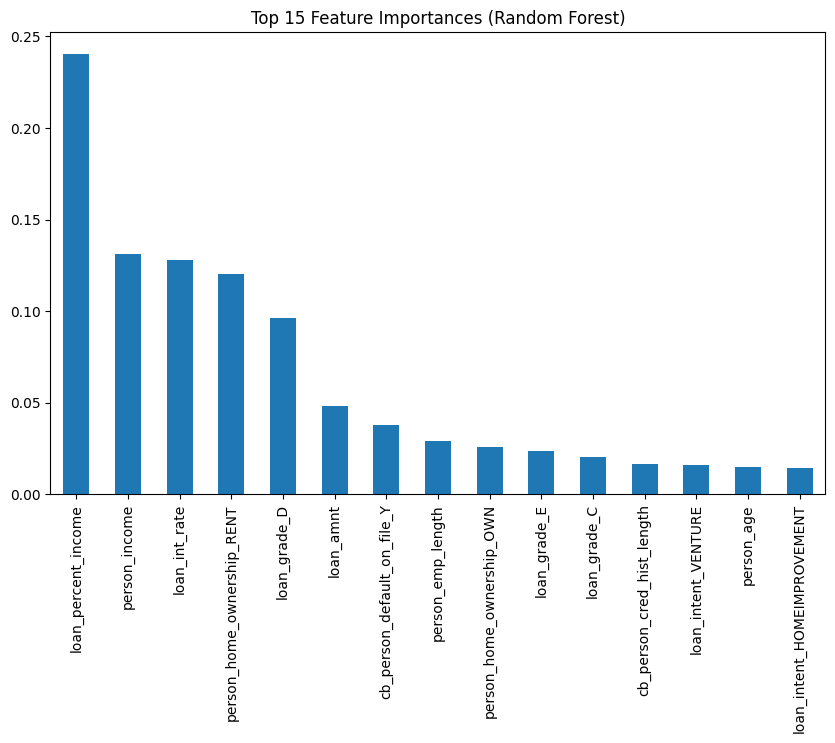

In [11]:

importances = pd.Series(
    rf.feature_importances_,
    index=X_train.columns
).sort_values(ascending=False)

plt.figure(figsize=(10,6))
importances.head(15).plot(kind='bar')
plt.title("Top 15 Feature Importances (Random Forest)")
plt.show()

Save Models

In [14]:
!mkdir -p models

In [15]:

import joblib

joblib.dump(log_reg, 'models/logistic_model.pkl')
joblib.dump(rf, 'models/random_forest_model.pkl')

['models/random_forest_model.pkl']